In [1]:
import pandas as pd 

dados = pd.read_csv('dados/train.csv')
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [2]:
dados.shape # 12283 sessoes

(12283, 12)

In [3]:
len(dados.fullVisitorId.unique()) # mostrou que tenho 9996 usuarios unicos 

9996

In [4]:
dados.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [5]:
data = dados.date.iloc[0]
data

20160902

In [6]:
type(data)

numpy.int64

In [7]:
data = str(dados.date.iloc[0]) # trocando pra tipo str 

In [8]:
data[0:4]

'2016'

### Temos um problema quando trabalhamos com id do tipo int, quando tem 0 mostra q o valor é negativo, temos que troca para o tipo str ai vai mostra os 0 certinho 

In [9]:
numero = int('00123')
numero

123

In [10]:
numero = '00123'
numero

'00123'

# Vamos arrumar agora ?

In [11]:
dados = pd.read_csv('dados/train.csv',  dtype={'date':object, 'fullVisitorId':object, 'visitId':object})
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


# Vamos arrumar a tabela com json

In [12]:
dados.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [13]:
type(dados.device.iloc[0])

str

In [14]:
import json

In [15]:
json.loads(dados.device.iloc[0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [16]:
type(json.loads(dados.device.iloc[0]))

dict

In [17]:
          # ela vai rodar em cada linha e transforma, e converteu em colunas  json ajuda nessas transformações 
pd.DataFrame([json.loads(linha)for linha in dados.device]) # lista 

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [18]:
dicionarios = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [19]:
for coluna in dicionarios:
    dados = dados.join(pd.DataFrame([json.loads(linha) for linha in dados[coluna]]))

In [20]:
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [21]:
dados.drop(dicionarios, axis= 1, inplace = True)

In [22]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [23]:
dados.channelGrouping.unique() # me retorna os valores unicos que tenho na coluna channelGrouping

array(['Organic Search', 'Affiliates', 'Direct', 'Social', 'Display',
       'Paid Search', 'Referral', '(Other)'], dtype=object)

In [24]:
len(dados.channelGrouping.unique()) # me retorna quantos valores tenho

8

In [25]:
dados.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'visits', 'hits',
       'pageviews', 'bounces', 'newVisits', 'transactionRevenue', 'campaign',
       'source', 'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect',
       'referralPath', 'adContent', 'campaignCode'],
      dtype='object')

In [26]:
dados.drop('adwordsClickInfo', axis = 1, inplace = True) # exclui porque não vai fazer diferença no nosso modelo

In [27]:
for coluna in dados.columns:
    print(coluna + ':' + str(len(dados[coluna].unique())))

channelGrouping:8
date:366
fullVisitorId:9997
sessionId:12276
socialEngagementType:1
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2


# Vamos limpar nosso dataset
tem var com apenas 1 valor, não vai ajuda na nossa analise, entao podemos limpar 

In [28]:
coluna_na = []

for coluna in dados.columns:
    print(coluna + ':' + str(len(dados[coluna].unique())))
    if len(dados[coluna].unique()) == 1:
        coluna_na.append(coluna)

channelGrouping:8
date:366
fullVisitorId:9997
sessionId:12276
socialEngagementType:1
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2


# Essas são as colunas com apenas 1 valor 

In [29]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [30]:
dados.drop(coluna_na, axis = 1, inplace = True)

In [31]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [32]:
dados.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
dtype: object

In [33]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [34]:

for coluna in quant:
    dados[coluna] = pd.to_numeric(dados[coluna])
    #                Ele escolhe qual é o melhor tipo exemplo str , int, date e etc....

In [35]:
dados.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
dtype: object

In [36]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [37]:
# são as pessoas que comprou no nosso site
dados.transactionRevenue.value_counts()

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
              ..
22490000.0     1
74850000.0     1
32490000.0     1
239880000.0    1
25240000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

#### Quantos valores nulos tem ?

In [38]:
dados.transactionRevenue.isna().sum()

12119

In [39]:
dados.transactionRevenue.fillna(0, inplace = True)
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,0.0,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [40]:
dados.transactionRevenue.value_counts()

# 0.0 = 12119 pesssoas que não compraram nada.

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

# Vamos trazer esses valor por formato normal 
É uma loja de roupa os produtos não são caros assim

In [41]:
dados.transactionRevenue = dados.transactionRevenue / 1000000

In [42]:
dados.transactionRevenue.value_counts()

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

# Quantos usuarios tem no nosso site ?

In [43]:
len(set(dados.fullVisitorId)) # set me trouxe os valores unicos é como se fosse o distinct 

9997

In [44]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

# Aqui teremos os resultados dos usuarios 

In [45]:
dados_quant = dados.groupby('fullVisitorId', as_index=False)[quant].sum() # as_index mostra os id 
dados_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


# Vamos treina nosso modelo 

In [46]:
y = dados_quant.transactionRevenue.copy() # copy ajuda no codigo de baixo, é uma estrategia interessante 

x = dados_quant.drop('transactionRevenue', axis = 1)

from sklearn.model_selection import train_test_split

In [47]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [48]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(treino_x, treino_y)

previssoes = modelo.predict(teste_x)
previssoes

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [49]:
treino_x.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [50]:
# vamos criar um dataframe
resultados = pd.DataFrame()

resultados['revenue'] = teste_y # quanto que o usuario comprou 

resultados['predict'] = previssoes # preveu oq aquele usuario gastou
resultados['erro'] = previssoes - teste_y # a diferença entre oque eu previ e quanto o usuario gastou 

resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [51]:
# vamos ver pros clientes que compraram
resultados[resultados.revenue > 0].head()

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275


# MSE

In [52]:
import numpy as np


np.mean((previssoes - teste_y)**2)

807.245929682092

# RMSE

In [53]:

np.sqrt(np.mean((previssoes - teste_y)**2))
# se esse valor for maior que o desvio padrao quer dizer que nosso modelo está errando e não poderia passar do valor

28.412073660366502

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
np.sqrt(mean_squared_error(teste_y, previssoes))
# se esse valor for maior que o desvio padrao quer dizer que nosso modelo está errando e não poderia passar do valor

28.412073660366516

In [56]:
np.mean(dados_quant.transactionRevenue)

1.778953686105831

In [57]:
np.std(dados_quant.transactionRevenue)

25.129905708017944

C:\Users\vitor\Colab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

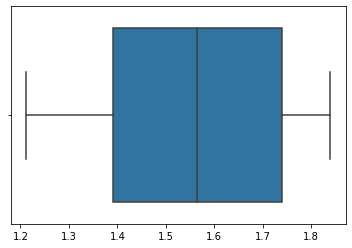

In [58]:
import seaborn as sns

sns.boxplot(previssoes)

C:\Users\vitor\Colab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactionRevenue'>

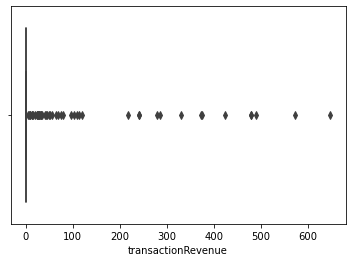

In [59]:
sns.boxplot(teste_y)

C:\Users\vitor\Colab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactionRevenue', ylabel='Density'>

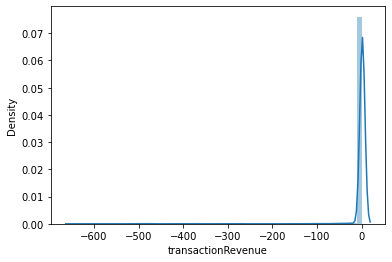

In [60]:
sns.distplot(previssoes - teste_y) # previssoes - teste_y me mostra o nosso erro 

# mostra que nosso modelo sempre está proximo a 0

# Novas variaveis 

## Estou Mostrando as ultimas visitas no nosso site

o maximo de visitas de cada cliente 

In [61]:
visitas_ultimas = dados.groupby('fullVisitorId', as_index = False)
visitas_ultimas['visitNumber'].max()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


In [62]:
usuarios_visitas_unicas = dados.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])
usuarios_visitas_unicas.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,0.0,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [63]:
usuarios_visitas_unicas.shape

(12270, 31)

In [64]:
visitas = pd.merge(visitas_ultimas, usuarios_visitas_unicas,
               left_on=['fullVisitorId', 'visitNumber'],
               right_on=['fullVisitorId', 'visitNumber'], how='left')

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed